<a href="https://colab.research.google.com/github/nse4real/bristish_airways_web-scraping_to_get_company_insights/blob/main/British_airways_web_scraping_to_get_company_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
#importing libraries for web-scraping & data analysis
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [102]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [103]:
df = pd.DataFrame()
df["reviewsx"] = reviews
df.head()

,reviewsx
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [104]:
!pip install gensim textblob
!pip install wordcloud
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [105]:
# Remove HTML tags
df['reviews'] = df['reviewsx'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [106]:
# Remove punctuation and special characters
df['reviews'] = df['reviews'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [107]:
# Convert all text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: x.lower())

In [108]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [109]:
# Tokenize the text
df['reviews'] = df['reviews'].apply(lambda x: nltk.word_tokenize(x))

In [110]:
# Stem or lemmatize the tokens
lemmatizer = WordNetLemmatizer()
df['reviews'] = df['reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [111]:
# Remove meaningless words like "a," "an," "the," and words that do not provide meaningful information like "very," "really"
meaningless_words = ['a', 'an', 'the', 'very', 'really']
df['reviews'] = df['reviews'].apply(lambda x: [word for word in x if word not in meaningless_words])

In [112]:
# Remove "✅ Trip Verified" and "Not Verified"
df['reviews'] = df['reviews'].apply(lambda x: [word for word in x if word != '✅' and word != 'Trip' and word != 'Verified' and word != 'Not'])

In [113]:
# Create a dictionary and a corpus using the processed reviews
dictionary = gensim.corpora.Dictionary(df['reviews'])
corpus = [dictionary.doc2bow(review) for review in df['reviews']]

In [114]:
# Train a Latent Dirichlet Allocation (LDA) model on the corpus
model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary)

In [115]:
# Print the topics of the LDA model
topics = model.print_topics()
for topic in topics:
  print(topic)

(0, '0.016*"ba" + 0.015*"flight" + 0.014*"seat" + 0.013*"trip" + 0.012*"verified" + 0.012*"service" + 0.007*"london" + 0.007*"class" + 0.007*"staff" + 0.007*"business"')
(1, '0.020*"flight" + 0.018*"ba" + 0.014*"seat" + 0.011*"verified" + 0.009*"trip" + 0.008*"service" + 0.007*"hour" + 0.006*"cabin" + 0.006*"one" + 0.005*"london"')
(2, '0.027*"flight" + 0.016*"seat" + 0.013*"verified" + 0.012*"trip" + 0.010*"london" + 0.010*"service" + 0.009*"good" + 0.008*"food" + 0.008*"crew" + 0.007*"cabin"')
(3, '0.028*"flight" + 0.013*"ba" + 0.012*"verified" + 0.010*"trip" + 0.009*"service" + 0.009*"time" + 0.007*"london" + 0.007*"seat" + 0.007*"hour" + 0.007*"crew"')
(4, '0.029*"flight" + 0.016*"ba" + 0.012*"trip" + 0.010*"london" + 0.010*"verified" + 0.009*"time" + 0.007*"hour" + 0.007*"seat" + 0.006*"food" + 0.005*"crew"')


In [116]:
# Compute the sentiment of each review using TextBlob
sentiments = [TextBlob(review).sentiment.polarity for review in reviews]

In [117]:
# Print the average sentiment of the reviews
print(f'Average sentiment: {np.mean(sentiments):.2f}')

Average sentiment: 0.08


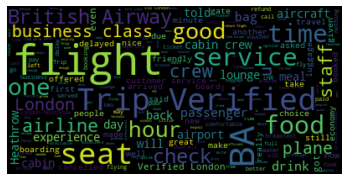

In [118]:
# Generate a word cloud for the most common words in the reviews
review_text = ' '.join(df['reviewsx'])
wordcloud = WordCloud(max_font_size=50).generate(review_text)

# Plot the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This code generates a word cloud using the WordCloud class and displays it using matplotlib.